In [100]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten, Input, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping


## Step 1: Loading the dataset

In [72]:
# CORREGIR ESTO PARA SUBIRLO SIN MI DIR
data_dir = r"C:/Users/Agustín/Desktop/4Geeks/Clases/26. Intro to Deep Learning/train/train"

# Pictures by 'Dog' or 'Cat'
'''
This code was good prior to some changes
file_list = os.listdir(data_dir)
cat_list = [i for i in file_list if 'cat' in i]
dog_list = [i for i in file_list if 'dog' in i]
'''
dog_subfolder = os.path.join(data_dir, "dog")
dog_list = os.listdir(dog_subfolder)
cats_subfolder = os.path.join(data_dir, "cat")
cat_list = os.listdir(cats_subfolder)


## Step 2: Visualize the input information

In [73]:
dog_images = []
for i in range(9):
    img_path = os.path.join(dog_subfolder, dog_list[i])
    img = image.load_img(img_path)
    img_array = image.img_to_array(img)
    img_array /= 255.0
    dog_images.append(img_array)

In [74]:
cat_images = []
for i in range(9):
    img_path = os.path.join(cats_subfolder, cat_list[i])
    img = image.load_img(img_path)
    img_array = image.img_to_array(img)
    img_array /= 255.0
    cat_images.append(img_array)

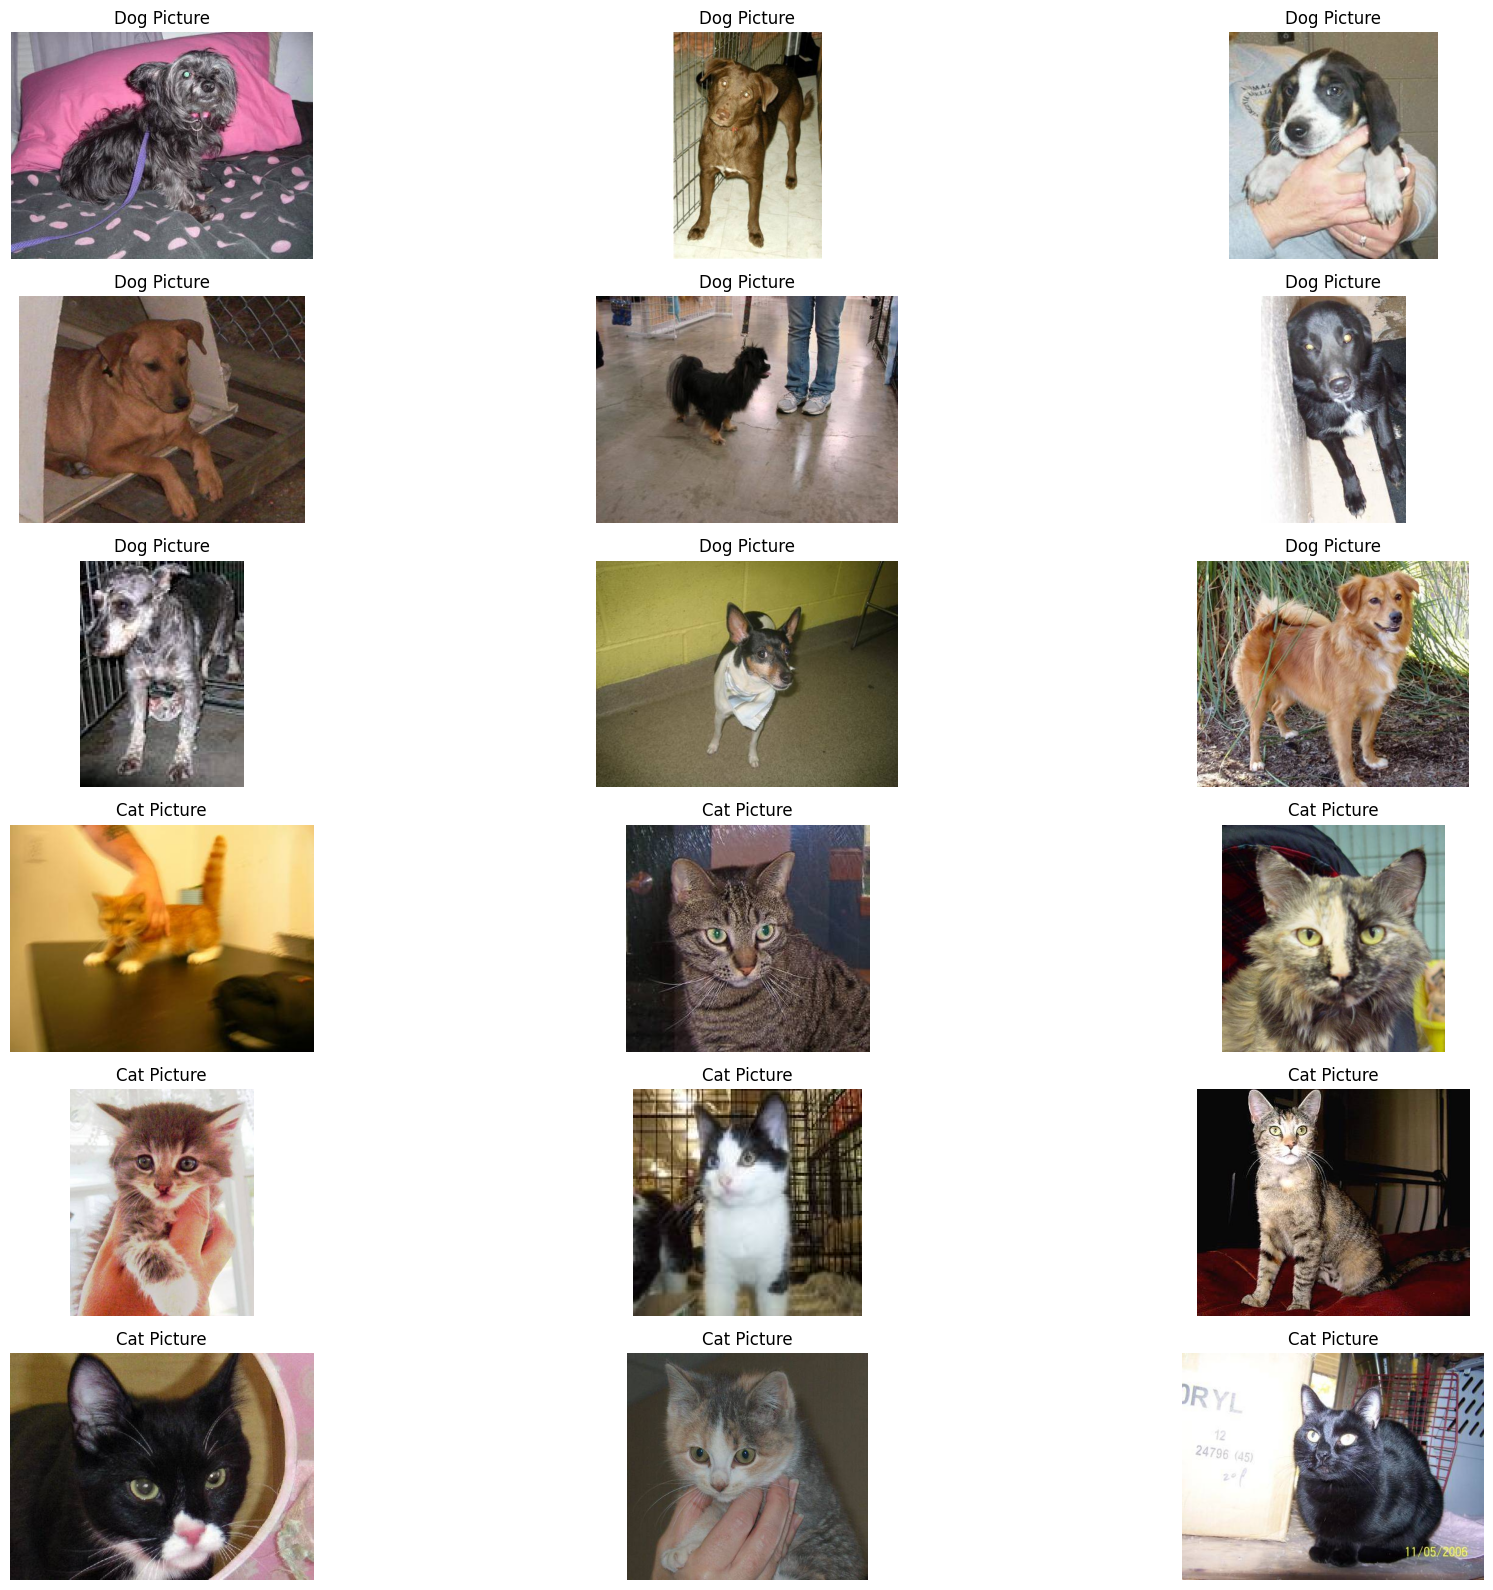

In [75]:
plt.figure(figsize=(20, 16))

for index, image in enumerate(dog_images[:10]):  
    plt.subplot(6, 3, index + 1)
    plt.imshow(image)  
    plt.title('Dog Picture')
    plt.axis('off')

for index, image in enumerate(cat_images[:10]):  
    plt.subplot(6, 3, index + 10)
    plt.imshow(image)  
    plt.title('Cat Picture')
    plt.axis('off')

plt.tight_layout()
plt.show()

### create an ImageDataGenerator object for training and test data

In [76]:
# Train Dir
train_dir = data_dir
test_dir = r"C:/Users/Agustín/Desktop/4Geeks/Clases/26. Intro to Deep Learning/test"
image_size = (200, 200)

datagentrain = ImageDataGenerator()
datagentest = ImageDataGenerator()

# Training Data Generation
train_data = datagentrain.flow_from_directory(
    train_dir,
    target_size = image_size,
    classes = ["dog", "cat"] 
)

# Test Data Generation
test_data = datagentest.flow_from_directory(
    test_dir,
    target_size = image_size,
    classes = ["test"] 
)

Found 25000 images belonging to 2 classes.
Found 12500 images belonging to 1 classes.


## Step 3: Build an ANN


In [79]:
model = Sequential()
model.add(Input(shape=(224, 224, 3)))  # Change this due to a warning from keras

model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

model.add(GlobalAveragePooling2D()) # found this due to an error of layer dimensions

# Dense Layers
model.add(Flatten())
model.add(Dense(units=4096, activation="relu"))
model.add(Dense(units=4096, activation="relu"))
model.add(Dense(units=2, activation="softmax"))


In [ ]:
# Complie the model
model.compile(
    optimizer=Adam(learning_rate=0.001),  
    loss='categorical_crossentropy',       # 'categorical_crossentropy' for 2 or more categories
    metrics=['accuracy']                   
)


In [ ]:
# Trainign the model
'''
history = model.fit(
    train_data,
    epochs=1
)'''

782/782 ━━━━━━━━━━━━━━━━━━━━ 29775s 38s/step - accuracy: 0.4973 - loss: 0.9424


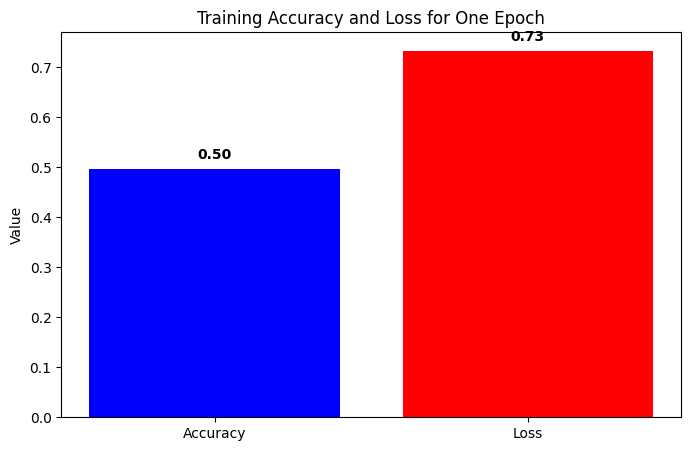

In [90]:
metrics = ['Accuracy', 'Loss']
values = [history.history['accuracy'][0], history.history['loss'][0]]

plt.figure(figsize=(8, 5))
plt.bar(metrics, values, color=['blue', 'red'])
plt.title('Training Accuracy and Loss for One Epoch')
plt.ylabel('Value')

for i, v in enumerate(values):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontweight='bold')

plt.show()


In [92]:
checkpoint = ModelCheckpoint("../models/vgg16_1.keras", monitor="val_accuracy", verbose=1, save_best_only=True, save_weights_only=False, mode="auto")
early = EarlyStopping(monitor="val_accuracy", patience=3, verbose=1, mode="auto")

# Entrenar el modelo con los callbacks
hist = model.fit(train_data, steps_per_epoch=100, validation_data=test_data, validation_steps=10, epochs=3, callbacks=[checkpoint, early])


Epoch 1/3
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 42s/step - accuracy: 0.4898 - loss: 0.6932 

c:\Users\Agustín\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()



Epoch 1: val_accuracy improved from -inf to 0.00000, saving model to ../models/vgg16_1.keras
100/100 ━━━━━━━━━━━━━━━━━━━━ 4301s 43s/step - accuracy: 0.4899 - loss: 0.6932 - val_accuracy: 0.0000e+00 - val_loss: 1.3863
Epoch 2/3
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 38s/step - accuracy: 0.5100 - loss: 0.6931 
Epoch 2: val_accuracy improved from 0.00000 to 1.00000, saving model to ../models/vgg16_1.keras
100/100 ━━━━━━━━━━━━━━━━━━━━ 3893s 39s/step - accuracy: 0.5098 - loss: 0.6931 - val_accuracy: 1.0000 - val_loss: 1.3863
Epoch 3/3
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 38s/step - accuracy: 0.4968 - loss: 0.6932 
Epoch 3: val_accuracy did not improve from 1.00000
100/100 ━━━━━━━━━━━━━━━━━━━━ 3869s 39s/step - accuracy: 0.4968 - loss: 0.6932 - val_accuracy: 0.0000e+00 - val_loss: 1.3863


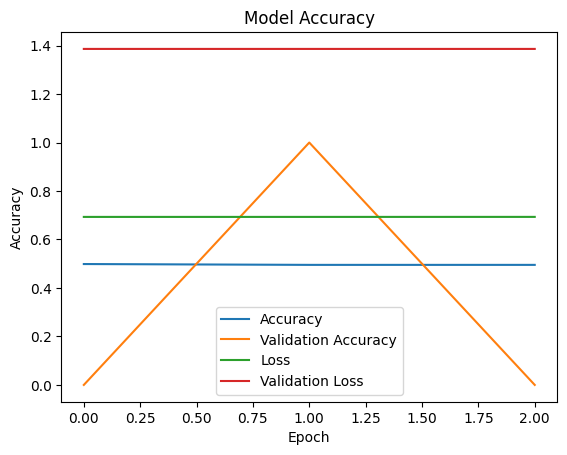

In [98]:
# Comprobar la exactitud de los datos

# Trazar los resultados
plt.plot(hist.history["accuracy"])
plt.plot(hist.history["val_accuracy"])
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])

# Configurar el diseño del gráfico
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy", "Validation Accuracy", "Loss", "Validation Loss"])

# Trazar
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
cat


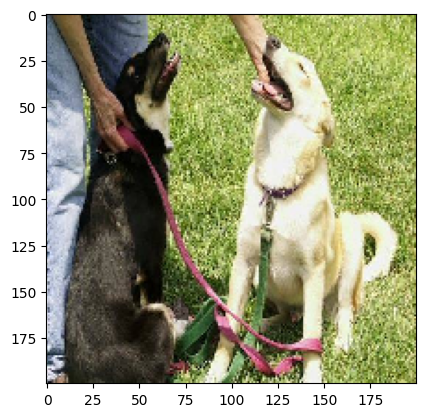

In [106]:
img = image.load_img(r"C:\Users\Agustín\Desktop\4Geeks\Clases\26. Intro to Deep Learning\test\test\33.jpg", target_size = (200, 200))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis = 0)
saved_model = load_model("../models/vgg16_1.keras")
output = saved_model.predict(img)
if output[0][0] > output[0][1]:
    print("cat")
else:
    print("dog")